# Generatori di variabili casuali continue con python

La guida completa sui generatori disponibili si trova nella [documentazione](https://docs.python.org/3/library/random.html) della libreria ```random```.

Anche il pacchetto ```scipy.stats``` contiene diverse funzioni statistiche, descritte nella [documentazione](https://docs.scipy.org/doc/scipy/reference/stats.html).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import binom
from scipy.stats import poisson
import math
random.seed(1234)

In [5]:
def plot_rnd(f, xmin, xmax, num = 100000):
    seq = [f() for i in range(num)]
    nbins = 100
    fig, ax = plt.subplots(figsize=(9,6))
    n, bins, patches = ax.hist(seq, nbins, density=True, range=(xmin, xmax))
    plt.xlabel('x')
    plt.ylabel('freq.')
    plt.show()

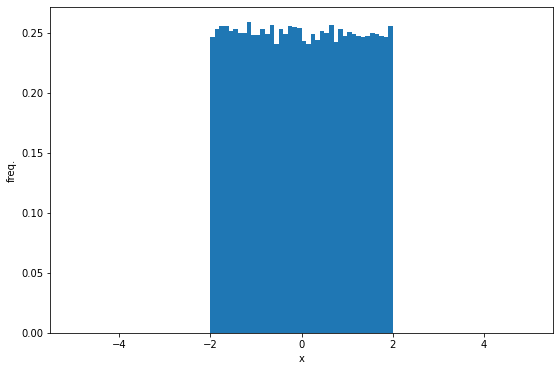

In [6]:
plot_rnd(lambda: random.uniform(-2, 2), -5, 5)

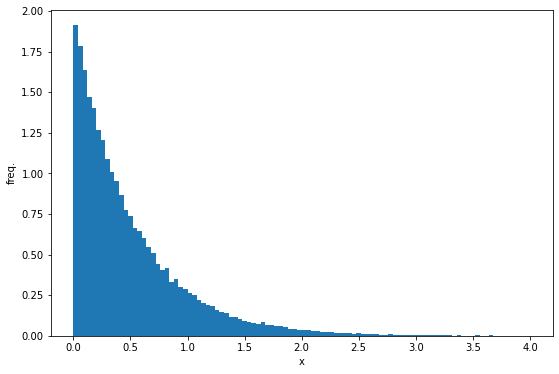

In [9]:
plot_rnd(lambda: random.expovariate(2), 0, 4)

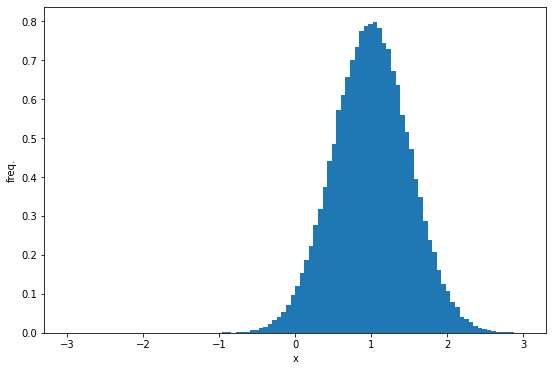

In [10]:
plot_rnd(lambda: random.gauss(1, 0.5), -3, 3)

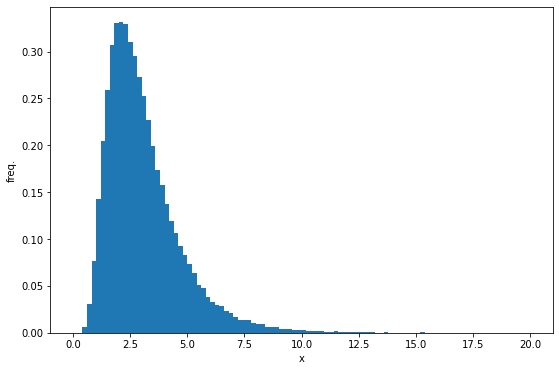

In [11]:
plot_rnd(lambda: random.lognormvariate(1, 0.5),0, 20)

La distribuzione binomiale ed il corrispondente generatore random sono definiti nel modulo ```scipy.stats.binom```.
Vedere la [documentazione](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html).

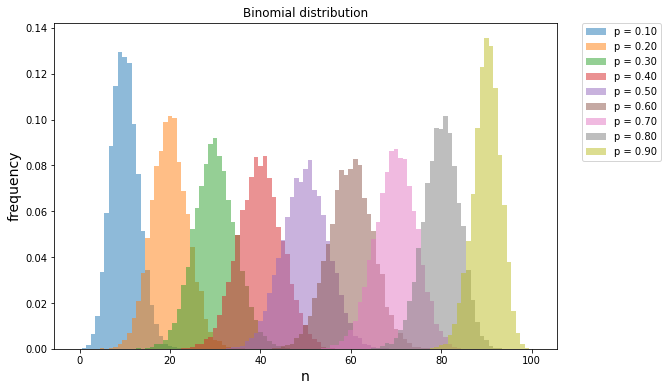

In [13]:
plt.figure(figsize=(9,6))
for p in np.arange(0.1, 1.0, 0.1):
    n = 100
    seq = binom.rvs(n, p, size=10000)
    nbins = n+1
    plt.hist(seq, nbins, density=True, range=(-0.5, n + 0.5), alpha=0.5, label = "p = {:.2f}".format(p))
plt.xlabel("n", size=14)
plt.ylabel("frequency", size=14)
plt.title("Binomial distribution")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

La distribuzione di Poisson ed il suo generatore random sono definiti nel modulo ```scipy.stats.poisson```.
Vedere la [documentazione](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html).

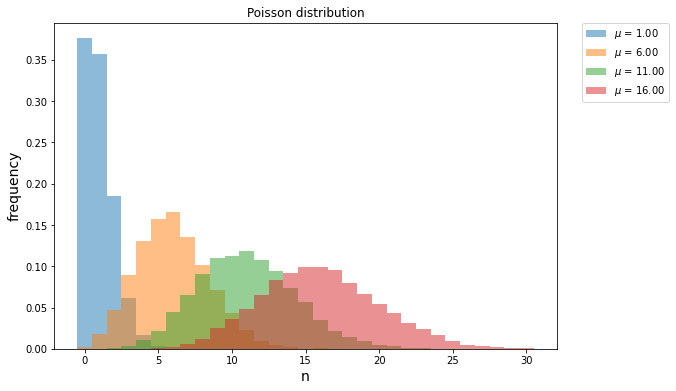

In [14]:
plt.figure(figsize=(9,6))
for nu in np.arange(1, 21, 5):
    seq = poisson.rvs(nu, size=10000)
    nbins = 31
    plt.hist(seq, nbins, density=True, range=(-0.5, nbins - 0.5), alpha=0.5, label = r"$\mu$ = {:.2f}".format(nu))
plt.xlabel("n", size=14)
plt.ylabel("frequency", size=14)
plt.title("Poisson distribution")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

## Teorema del limite centrale

Abbiamo $N$ variabili casuali $x_i$, $i=1,\cdots,N$. <span style="color: blue">Se la loro varianza è **finita**</span>, la loro media tenderà, per $N\rightarrow\infty$, ad avere una distribuzione normale.

La dimostrazione la omettiamo, ma proviamo a farla numericamente.

Consideriamo che:

$\displaystyle\mathbb{V}\mathrm{ar}[\bar{x}] = \frac{\sigma^2}{N}$

Quindi, se vogliamo costruire una combinazione degli $x_i$ che abbia la stessa deviazione standard $\sigma$ di ciascuna distribuzione individuale, dobbiamo definire:

$x^\star = \bar{x}\sqrt{N}$

In modo che:

$\displaystyle\mathbb{V}\mathrm{ar}[x^\star] = N\cdot\frac{\sigma^2}{N}=\sigma^2$

<span style="color: blue">Esempi di distribuzioni con varianza **infinita** si possono costruire partendo da funzioni che hanno "code" che decrescono come $1/x^2$ per $x\rightarrow \pm\infty$. Funzioni del genere sono normalizzabili ($1/x^2$ è integrabile), ma la varianza sarà infinità, perché il valor medio di $x^2$, richiede l'integrazione di $x^2/x^2=1$, che non è integrabile.</span>


In [15]:
from scipy.stats import norm
def plot_rnd_mean(f, n, sigma, xmin, xmax, num = 10000):
    def xn():
        return np.array([f() for j in range(n)]).mean()*math.sqrt(n)
    seq = np.array([xn() for i in range(num)])
    nbins = 100
    fig, ax = plt.subplots()
    n, bins, patches = ax.hist(seq, nbins, density=True, range=(xmin, xmax))
    x=np.arange(xmin, xmax, 0.1)
    ax.plot(x, norm.pdf(x, scale=sigma))
    plt.show()
    print("std. dev x*: ", seq.std())

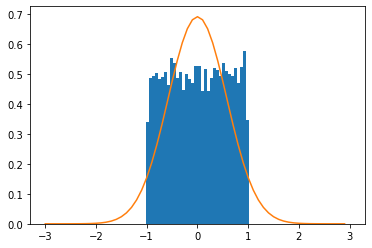

std. dev x*:  0.5810120590208242
std. dev x:  0.5773502691896257


In [16]:
from scipy.stats import uniform
sigma = uniform.std(loc=-1, scale=2)
plot_rnd_mean(lambda: uniform.rvs(loc=-1, scale=2), 1, sigma, -3, 3)
print("std. dev x: ", sigma)

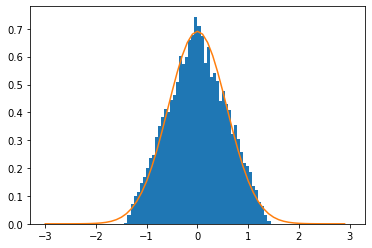

std. dev x*:  0.5728590478543477


In [18]:
plot_rnd_mean(lambda: uniform.rvs(loc=-1, scale=2), 2, sigma, -3, 3)

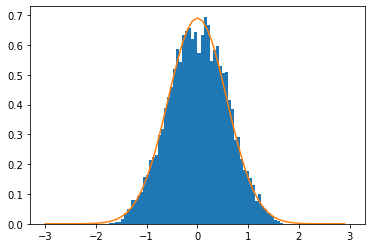

std. dev x*:  0.5726392784722201


In [17]:
plot_rnd_mean(lambda: uniform.rvs(loc=-1, scale=2), 3, sigma, -3, 3)

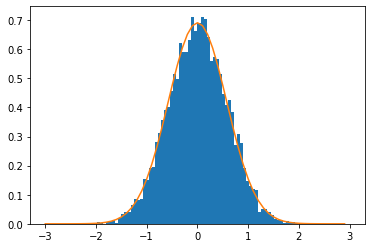

std. dev x*:  0.5789339769076822


In [19]:
plot_rnd_mean(lambda: random.uniform(-1, 1), 10, sigma, -3, 3)

Proviamo con una distribuzione esponenziale.

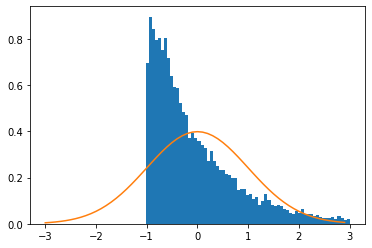

std. dev x*:  0.9932392268281448
std. dev x:  1.0


In [20]:
from scipy.stats import expon
sigma = expon.std(loc=-1)
plot_rnd_mean(lambda: expon.rvs(loc=-1), 1, sigma, -3, 3)
print("std. dev x: ", sigma)

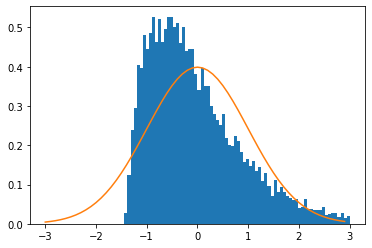

std. dev x*:  1.0045898712187695


In [21]:
plot_rnd_mean(lambda: expon.rvs(loc=-1), 2, sigma, -3, 3)

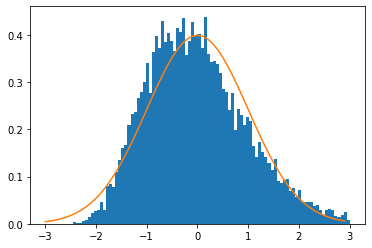

std. dev x*:  1.0153630224321366


In [22]:
plot_rnd_mean(lambda: expon.rvs(loc=-1), 10, sigma, -3, 3)

...la convergenza non è velocissima con una distribuzione esponenziale.

Definiamo una distribuzione custom.

In [24]:
def rnd_custom():
    r = random.randint(0,1)
    if r>0: return random.uniform(1, 2)
    else: return random.uniform(-2, -1)

Il valor medio sarà sicuramente pari a zero, ma dobbiamo calcolare la deviazione standard di questa distribuzione. 

La PDF sarà:

$\displaystyle f(x) = \left\{
\begin{array}{ll}
\frac{1}{2} & \mathrm{se} & -2<x<-1\,\,\mathrm{o}\,\,1<x<2\\
0 & \mathrm{altrove} &
\end{array}
\right.
$


La varianza è pari a:

$\displaystyle \mathbb{V}\mathrm{ar}[x] = \frac{1}{2}\left(
\int_{-2}^{-1}x^2\,\mathrm{d}x + \int_{1}^{2}x^2\,\mathrm{d}x
\right) =
\int_{1}^{2}x^2\,\mathrm{d}x =
\left[\frac{x^2}{2}
\right]^{2}_1 = \frac{4 - 1}{2} = 1.5
$


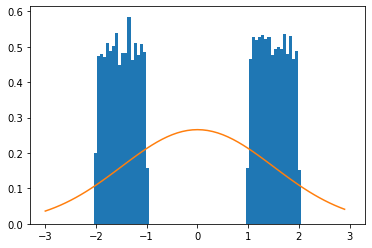

std. dev x*:  1.5255479105764835


In [25]:
sigma = 1.5
plot_rnd_mean(rnd_custom, 1, sigma, -3, 3)

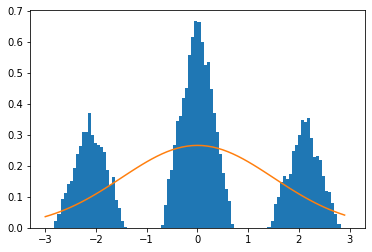

std. dev x*:  1.5351198986371701


In [76]:
plot_rnd_mean(rnd_custom, 2, sigma, -3, 3)

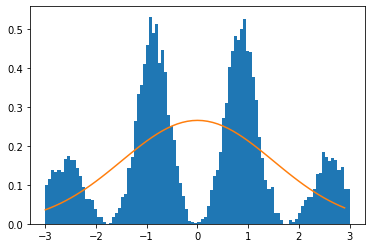

std. dev x*:  1.5365256309907136


In [26]:
plot_rnd_mean(rnd_custom, 3, sigma, -3, 3)

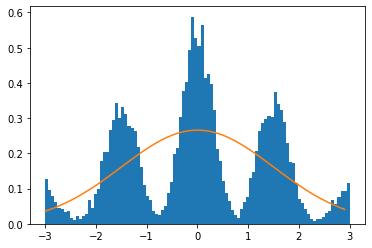

std. dev x*:  1.532384287717414


In [27]:
plot_rnd_mean(rnd_custom, 4, sigma, -3, 3)

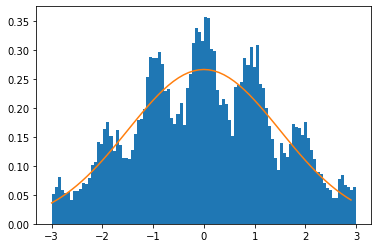

std. dev x*:  1.526980734349167


In [28]:
plot_rnd_mean(rnd_custom, 10, sigma, -3, 3)

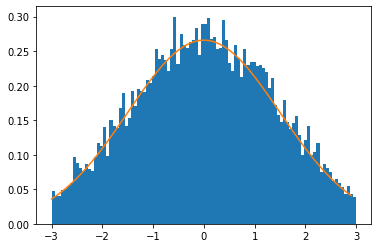

std. dev x*:  1.5245595173673323


In [80]:
plot_rnd_mean(rnd_custom, 50, sigma, -3, 3)

Questa dimostrazione giustifica l'uso della distribuzione normale in molte applicazioni. Ogni volta che un effetto è la risultante della sovrapposizione di tanti effetti diversi, la distribuzione si potrà approssimare con una gaussiana.

Questo è vero con tanti parametri che caratterizzano la risposta di un rivelatore, come la risoluzione nella misura di posizione, energia, ecc.